<a href="https://colab.research.google.com/github/AnanyaBurugupalli/AeroplanTickets/blob/main/AiroplaneTickets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data = pd.read_excel('Data_Train.xlsx')

In [ ]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


DATA CLEANING

In [ ]:
train_data.info()
# will return data type and the count of non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
train_data.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [ ]:
# obtaining the null values rows
train_data[train_data['Total_Stops'].isnull()]
# NaN = not available number

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [ ]:
#can you find the average price, maxium price and minimum price of the flight
print('Mean Price',train_data['Price'].mean())
print('Maximum Price',train_data['Price'].max())
print('Minimum Price',train_data['Price'].min())

Mean Price 9087.064120565385
Maximum Price 79512
Minimum Price 1759


In [ ]:
# The dropna() method removes the rows that contains NULL values.

train_data.dropna(inplace = True)
train_data.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


In [ ]:
train_data.dtypes

,0
Airline,object
Date_of_Journey,object
Source,object
Destination,object
Route,object
Dep_Time,object
Arrival_Time,object
Duration,object
Total_Stops,object
Additional_Info,object


In [ ]:
# to get the accurate memory usage of the dataframe train_data
train_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 7.4 MB


In [ ]:
# Making a copy of data frame
data = train_data.copy()

In [ ]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [ ]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [ ]:
# Extracting the day and month from the date_of_journey
# converting the data_of_journey(object type similar to string) data type to datetime(timestamp)
# data types after conversion should be datetime64[ns] or M8[ns]

def change_into_datetime(col):
    data[col] = pd.to_datetime(data[col])

In [ ]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
for feature in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']:
    change_into_datetime(feature)

In [ ]:
data.dtypes

,0
Airline,object
Date_of_Journey,datetime64[ns]
Source,object
Destination,object
Route,object
Dep_Time,datetime64[ns]
Arrival_Time,datetime64[ns]
Duration,object
Total_Stops,object
Additional_Info,object


In [ ]:
data['Journey_day'] = data['Date_of_Journey'].dt.day

In [ ]:
data['Journey_month'] = data['Date_of_Journey'].dt.month

In [ ]:
data['Journey_year'] = data['Date_of_Journey'].dt.year

In [ ]:
# we have to extract Dep_hour and Dep_Min same for arrival

def extract_hour_min(df, col):
    df[col + '_hour'] = df[col].dt.hour
    df[col+ '_min'] = df[col].dt.minute
    return df.head(3)

In [ ]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Journey_year'],
      dtype='object')

In [ ]:
extract_hour_min(data, 'Dep_Time')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-02-11 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-02-11 05:50:00,2025-02-11 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-02-11 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25


In [ ]:
extract_hour_min(data, 'Arrival_Time')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-02-11 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-02-11 05:50:00,2025-02-11 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-02-11 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [ ]:
extract_hour_min(data, 'Arrival_Time')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-02-11 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-02-11 05:50:00,2025-02-11 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-02-11 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,9,25,4,25


In [ ]:
cols_to_drop = ['Arrival_Time','Dep_Time']
data.drop(cols_to_drop, axis = 1, inplace= True)


In [ ]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Airline            10682 non-null  object        
 1   Date_of_Journey    10682 non-null  datetime64[ns]
 2   Source             10682 non-null  object        
 3   Destination        10682 non-null  object        
 4   Route              10682 non-null  object        
 5   Duration           10682 non-null  object        
 6   Total_Stops        10682 non-null  object        
 7   Additional_Info    10682 non-null  object        
 8   Price              10682 non-null  int64         
 9   Journey_day        10682 non-null  int32         
 10  Journey_month      10682 non-null  int32         
 11  Journey_year       10682 non-null  int32         
 12  Dep_Time_hour      10682 non-null  int32         
 13  Dep_Time_min       10682 non-null  int32         
 14  Arrival_Tim

DATA ANALYSIS

In [ ]:
def flight_departure_time(x):
    if (x > 4) and (x <=8):
        return "Early Morning"
    elif (x > 8) and (x <= 12):
        return "Morning"
    elif (x > 12) and (x <= 16):
        return "Afternoon"
    elif (x > 20 ) and (x <= 24):
        return "Night"
    else:
        return "Late Night"

In [ ]:
data['Dep_Time_hour'].apply(flight_departure_time).value_counts()

,count
Dep_Time_hour,
Early Morning,2880
Late Night,2822
Morning,2209
Afternoon,1731
Night,1040


<Axes: xlabel='Dep_Time_hour'>

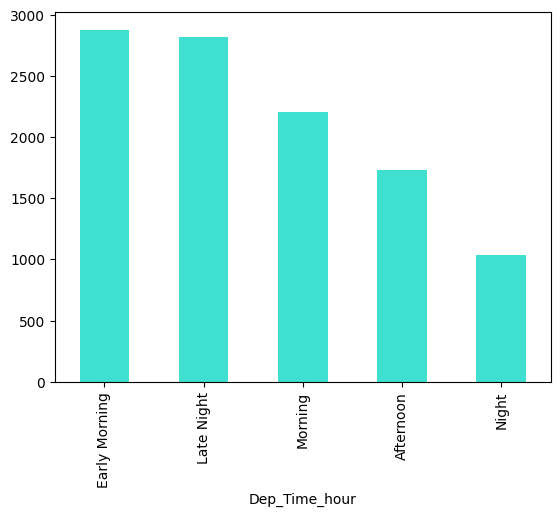

In [ ]:
data['Dep_Time_hour'].apply(flight_departure_time).value_counts().plot(kind= 'bar', color = 'turquoise')

In [ ]:
# following code should be written to use the cufflinks

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

print(__version__) # requires version >= 1.9.0
# For Notebooks
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

5.24.1


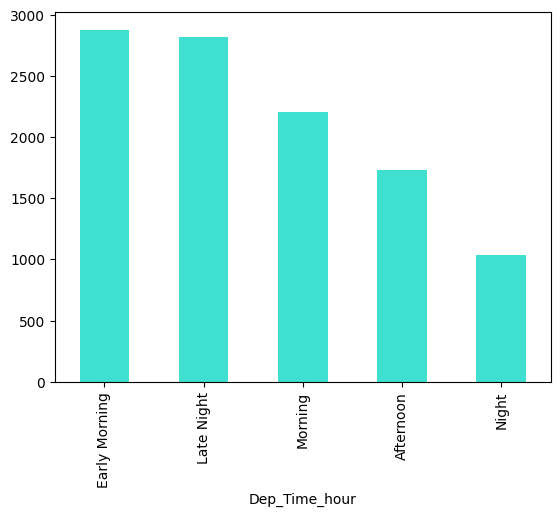

In [ ]:
import matplotlib.pyplot as plt
data['Dep_Time_hour'].apply(flight_departure_time).value_counts().plot(kind='bar', color='turquoise')
plt.show()


In [ ]:
# 50m -> 0h 50m
# 2h -> 2h 0m

def preprocess_duration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' + '0m'


    return x

In [ ]:
data['Duration'] = data['Duration'].apply(preprocess_duration)

In [ ]:
type(data['Duration'][0].split(' ')[0][0:-1])

str

In [ ]:
data['Duration'][0].split(' ')[0][0:-1]

'2'

In [ ]:
data['Duration_Hour'] = data['Duration'].apply(lambda x : int(x.split(' ')[0][0:-1]))
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_min',
       'Arrival_Time_hour', 'Arrival_Time_min', 'Duration_Hour'],
      dtype='object')

In [ ]:
data['Duration_Hour']

,Duration_Hour
0,2
1,7
2,19
3,5
4,4
...,...
10678,2
10679,2
10680,3
10681,2


In [ ]:
data['Duration_Minutes'] = data['Duration'].apply(lambda x : int(x.split(' ')[1][0:-1]))
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_min',
       'Arrival_Time_hour', 'Arrival_Time_min', 'Duration_Hour',
       'Duration_Minutes'],
      dtype='object')

In [ ]:
data['Duration_Minutes']

,Duration_Minutes
0,50
1,25
2,0
3,25
4,45
...,...
10678,30
10679,35
10680,0
10681,40


In [ ]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_min',
       'Arrival_Time_hour', 'Arrival_Time_min', 'Duration_Hour',
       'Duration_Minutes'],
      dtype='object')

In [ ]:
data['Duration']

,Duration
0,2h 50m
1,7h 25m
2,19h 0m
3,5h 25m
4,4h 45m
...,...
10678,2h 30m
10679,2h 35m
10680,3h 0m
10681,2h 40m


In [ ]:
total_duration=data['Duration']

In [ ]:
eval('2*14')

28

In [ ]:
data['Duration'].str.replace('h', '*60')

,Duration
0,2*60 50m
1,7*60 25m
2,19*60 0m
3,5*60 25m
4,4*60 45m
...,...
10678,2*60 30m
10679,2*60 35m
10680,3*60 0m
10681,2*60 40m


In [ ]:
data['Duration_Total_Minutes'] = data['Duration'].str.replace('h', '*60').str.replace(' ', '+').str.replace('m', '*1').apply(eval)

In [ ]:
data["Duration_Total_Minutes"].head(3)

,Duration_Total_Minutes
0,170
1,445
2,1140


<Axes: xlabel='Duration_Total_Minutes', ylabel='Price'>

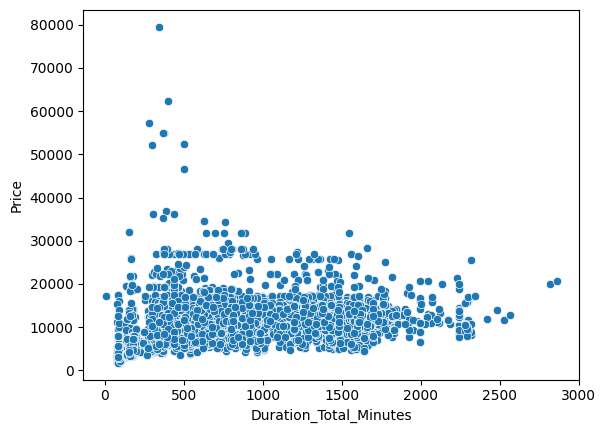

In [ ]:
# creating scatter plots

sns.scatterplot(x = 'Duration_Total_Minutes', y = 'Price', data = data)

<Axes: xlabel='Duration_Total_Minutes', ylabel='Price'>

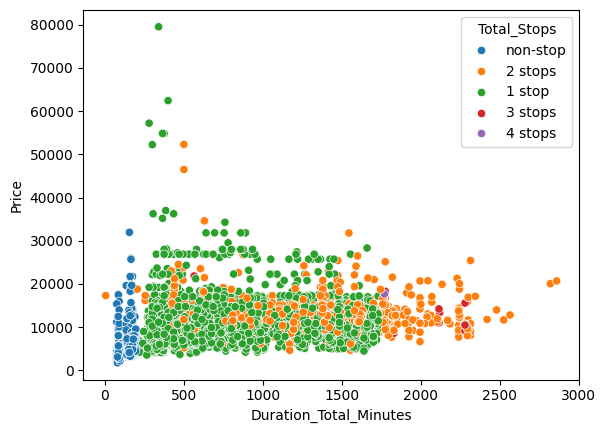

In [ ]:
# creating scatter plots

sns.scatterplot(x = 'Duration_Total_Minutes', y = 'Price', data = data, hue = 'Total_Stops')

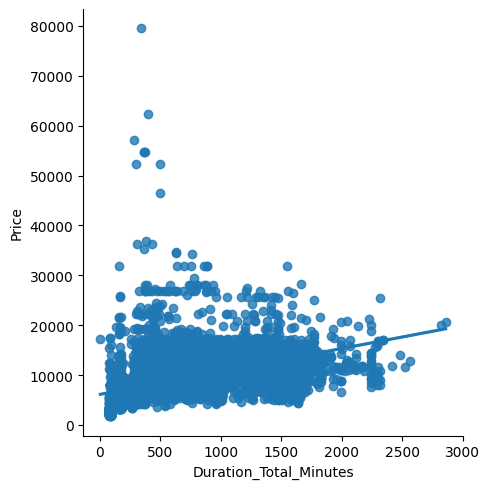

In [ ]:
# lmplot() method is used to plot data and draw regression model fits across grids where multiple plots can be plotted

sns.lmplot(x = 'Duration_Total_Minutes', y = 'Price', data = data)

In [ ]:
data[data['Airline'] == 'Jet Airways'].groupby('Route').size().sort_values(ascending = False)

,0
Route,
CCU → BOM → BLR,930
DEL → BOM → COK,875
BLR → BOM → DEL,385
BLR → DEL,382
CCU → DEL → BLR,300
BOM → HYD,207
DEL → JAI → BOM → COK,207
DEL → AMD → BOM → COK,141
DEL → IDR → BOM → COK,86


<function matplotlib.pyplot.show(close=None, block=None)>

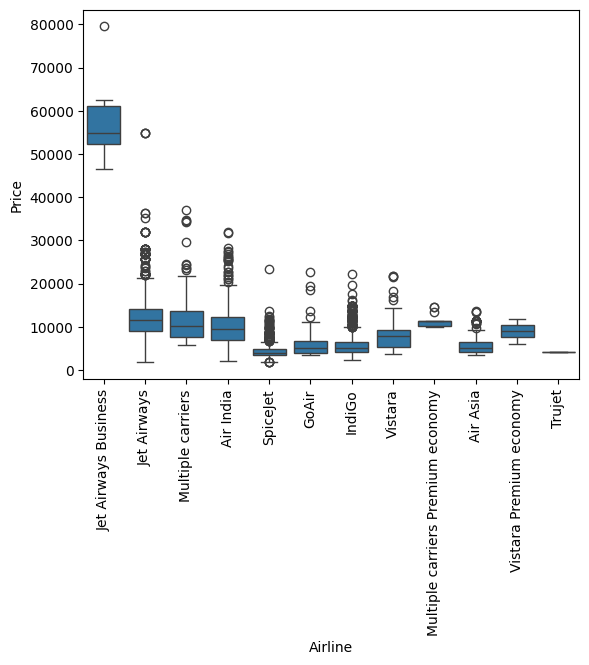

In [ ]:
sns.boxplot(y = 'Price', x = 'Airline', data = data.sort_values('Price', ascending= False))
# fixing the overlapping rotation of x axis
plt.xticks(rotation = 'vertical')
plt.show

In [ ]:
# Finding all the categorical columns

cat_col = [col for col in data.columns if data[col].dtype == 'object']
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [ ]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [ ]:
data['Source'].apply(lambda x : 1 if x == 'Banglore' else 0)

,Source
0,1
1,0
2,0
3,0
4,1
...,...
10678,0
10679,0
10680,1
10681,1


In [ ]:
# code for one-hot encoding
# do it for nominal data not for ordinal data and keep in mind about the Dimensionality
for sub_category in data['Source'].unique():
    data['Source_' + sub_category] =  data['Source'].apply(lambda x : 1 if x == sub_category else 0)

In [ ]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [ ]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [ ]:
dict_airlines =  {key:index for index, key in enumerate(airlines, 0)}

In [ ]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [ ]:
# Mapping the dictionary to the Airlines column
data['Airline'] = data['Airline'].map(dict_airlines)

In [ ]:
data['Airline']

,Airline
0,3
1,7
2,10
3,3
4,3
...,...
10678,2
10679,7
10680,10
10681,5


In [ ]:
# New Delhi and Delhi are practically the same so we replace New Delhi with Delhi
data['Destination'].replace('New Delhi', 'Delhi', inplace= True)

In [ ]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [ ]:
dest =  data.groupby(['Destination'])['Price'].mean().sort_values().index

In [ ]:
dest


Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [ ]:
dict_dest =  {key:index for index, key in enumerate(dest, 0)}

In [ ]:
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [ ]:
data['Destination'] = data['Destination'].map(dict_dest)

In [ ]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [ ]:
stop = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [ ]:
data['Total_Stops'] = data['Total_Stops'].map(stop)

In [ ]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Time_hour', 'Dep_Time_min',
       'Arrival_Time_hour', 'Arrival_Time_min', 'Duration_Hour',
       'Duration_Minutes', 'Duration_Total_Minutes', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [ ]:
data['Additional_Info'].value_counts()/len(data)*100

,count
Additional_Info,
No info,78.112713
In-flight meal not included,18.554578
No check-in baggage included,2.995694
1 Long layover,0.177869
Change airports,0.065531
Business class,0.037446
No Info,0.028085
1 Short layover,0.009362
Red-eye flight,0.009362


In [ ]:
data['Journey_year'].nunique()

1

In [ ]:
data.drop(columns=['Date_of_Journey', 'Source','Additional_Info','Journey_year', 'Route'], axis = 1, inplace =True)
data.head(2)

,Airline,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_Hour,Duration_Minutes,Duration_Total_Minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,2h 50m,0,3897,24,3,22,20,1,10,2,50,170,1,0,0,0,0
1,7,3,7h 25m,2,7662,1,5,5,50,13,15,7,25,445,0,1,0,0,0


In [ ]:
data.drop(columns = ['Duration'],axis = 1, inplace = True)
data.head(2)

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_Hour,Duration_Minutes,Duration_Total_Minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,22,20,1,10,2,50,170,1,0,0,0,0
1,7,3,2,7662,1,5,5,50,13,15,7,25,445,0,1,0,0,0


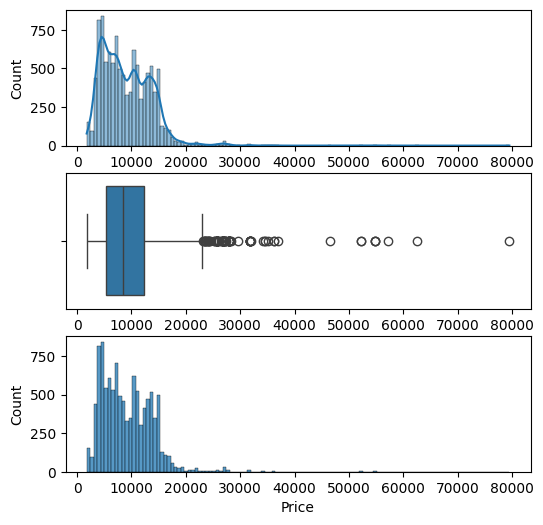

In [ ]:
def plot(df, col):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(6, 6))

    sns.histplot(df[col], ax=ax1, kde=True)  # Use histplot for distribution with KDE
    sns.boxplot(x=df[col], ax=ax2)  # boxplot expects x or y argument for data
    sns.histplot(df[col], ax=ax3, kde=False)  # Use histplot without KDE

plot(data, 'Price')

In [ ]:
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)

iqr = q3 - q1
minimum = q1 - 1.5*iqr
maximum = q3 + 1.5*iqr

In [ ]:
print(maximum)
print(minimum)

23017.0
-5367.0


In [ ]:
print([price for price in data['Price'] if price > maximum or price < minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [ ]:
len([price for price in data['Price'] if price > maximum or price < minimum])

94

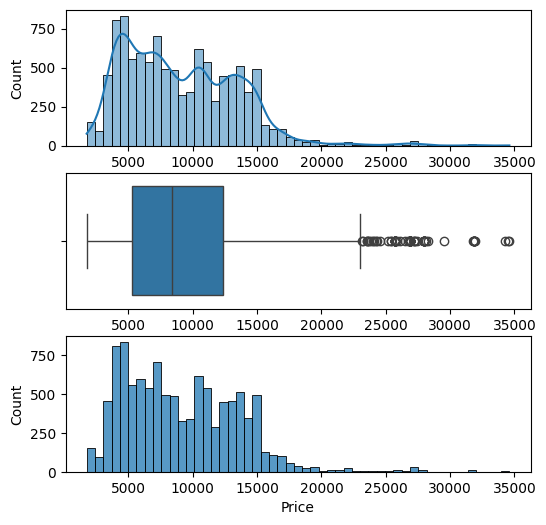

In [ ]:
data['Price'] = np.where(data['Price']>= 35000, data['Price'].median(), data['Price'])
plot(data, 'Price')

In [ ]:
X = data.drop(['Price'], axis = 1)

In [ ]:
y = data['Price']

In [ ]:
from sklearn.feature_selection import mutual_info_regression

imp = mutual_info_regression(X, y)

In [ ]:
imp

array([1.32212432, 1.06399459, 0.79164679, 0.36989478, 0.63323484,
       0.92781428, 0.74972226, 1.13321995, 0.90031516, 1.12173488,
       0.6799323 , 1.7704393 , 0.38231262, 0.46240587, 0.51257211,
       0.13292847, 0.20433931])

In [ ]:
imp_df = pd.DataFrame(imp, index = X.columns)

In [ ]:
imp_df.columns = ['importance']

In [ ]:
imp_df.sort_values('importance', ascending = False)

,importance
Duration_Total_Minutes,1.770439
Airline,1.322124
Arrival_Time_hour,1.133220
Duration_Hour,1.121735
Destination,1.063995
Dep_Time_hour,0.927814
Arrival_Time_min,0.900315
Total_Stops,0.791647
Dep_Time_min,0.749722
Duration_Minutes,0.679932


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# random state
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 42
)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
ml_model = RandomForestRegressor()

In [ ]:
ml_model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = ml_model.predict(X_test)

In [ ]:
y_pred

array([16831.39      ,  5611.26      ,  8850.7       , ...,
        3576.42      ,  6414.73333333,  6863.67      ])

In [ ]:
from sklearn import metrics

In [ ]:
  metrics.r2_score(y_test, y_pred)

0.8153802440961455